<div style='background-image: url("main.png") ; padding: 0px ; background-size: cover ; border-radius: 5px ; height: 200px ; width: 100%'>
    <div style="float: right ; margin: 20px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.9) ; width: 50% ; height: 150px">
        <div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , .8) ; line-height: 100%">Électrocinétique
            </div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.5)">Circuits du 1<sup>e</sup> ordre | Régime transitoire et permanent
             </div>
        </div>
    </div>
</div>

In [1]:
# commande permettant d'insérer les figures matplotlib dans les notebooks
%matplotlib widget

# import des librairies 
import numpy as np
import matplotlib.pyplot as plt

# Mise en œuvre du problème physique
On étudie la résolution numérique d'une équation du premier ordre à coefficients constants avec terme source. Un tel système obéit à l'équation différentielle :
$$\tau\dot{x} + x = f(t)$$

&nbsp;
La fonction $t\mapsto f(t)$ est connue, typiquement une fonction constante ou une fonction sinusoïdale. Par ailleurs, à cette équation est associée une condition initiale $x(t=0)= x_0$.

&nbsp;
On cherchera à tracer l'évolution de la grandeur $x$ au cours du temps.

## Paramètres physiques du problème étudié
Les grandeurs physiques à implémenter sont $\tau$ notée `tau`, la condition initiale $x_0$, notée `x0`, ainsi que la fonction $t\mapsto f(t)$ qui sera implémentée sous la forme d'une fonction `source`.

&nbsp;
La fonction `source`implémentée permet de traiter un forçage constant ou un forçage sinusoïdal. Il suffit pour celà de choisir la grandeur renvoyée, en mettant en commentaire l'autre :
* `return forcage`pour un forçage constant ;
* `return forcage*np.cos(2*np.pi*temp/periode)`pour un forçage sinusoïdal d'amplitude `forcage`, et de période `periode`.

In [2]:
# Paramètres physiques
tau = 1.0 # Temps caractéristique du système
x0 = -2.# Condition initiale x(t=0)
forcage = .50 # Amplitude du forçage (constant ou sinusoïdal)
periode = 4.0 # Période du forçage sinusoïdal

# Fonction de forçage constant ou sinusoïdal
def source(temp) :
#    return forcage
    return forcage*np.cos(2*np.pi*temp/periode)

## Paramètres numériques de la simulation 
La durée de la simulation et les paramètres de discrétisation sont également renseignés :
* durée : $T=20~\text{s}$, noté `L_time` ;
* nombre d'intervalles de temps $N$, noté `N_time` ;
* pas de temps $\text{d}t$, noté `dt`.

In [3]:
L_time = 20               # durée de la simulation
N_time = 1000            # discrétisation temporelle

dt = L_time/(N_time-1)    # pas de temps

# Résolution numérique du problème physique
## Schéma numérique pour le calcul du $\dot{x}$
La relation de Taylor écrite à l'instant $t+\text{d}t$ permet d'établir :
$$x(t+\text{d}t) \simeq x(t) + \text{d}t \dfrac{\text{d} x}{\text{d} t}$$

En remarquant que l'ensemble des instants $t\in[0,T]$ est représenté par l'array `t[i]` et qu'ainsi $t_i=i\times \Delta t$, soit `t[i]=i*dt`, on peut noter $x(t)=x(i\Delta t)=x_{i}$, et il vient :
$$\begin{array}{l}
x(t)=x(i\Delta t)=x_i \\
x(t+\text{d}t)=x((i+1)\Delta t)=x_{i+1}
\end{array}$$


On peut donc approximer le calcul de la dérivée temporelle par :
$$\boxed{
\dfrac{\text{d}x_i}{\text{d}t} \simeq \dfrac{x_{i+1} - x_i}{\Delta t}
}$$

Cette méthode d'approximation de la dérivée temporelle est appelée *méthode d'Euler*.

## Implémentation finale
Ainsi l'expression discrète de l'équation différentielle initiale peut s'exprimer sous la forme :
$$
\frac{x_{i+1}-x_i}{\Delta t}+\frac{1}{\tau}x_i=\frac{f(t_i)}{\tau}
$$

&nbsp;
Cette relation permet d'écrire de façon explicite :
$$\boxed{
x_{i+1}=x_i\left(1-\frac{\Delta t}{\tau}\right) + \frac{\Delta t}{\tau} f(t_i)
}$$

&nbsp;
La connaissance des valeurs $x_i=x(t_i)$ et $f(t_i)$ permet donc de &laquo;prévoir&raquo; la valeur de $x_{i+1}=x(t_{i+1})$ par récurrence, à condition de lui donner une première valeur correspondant à $x(t=0)$.

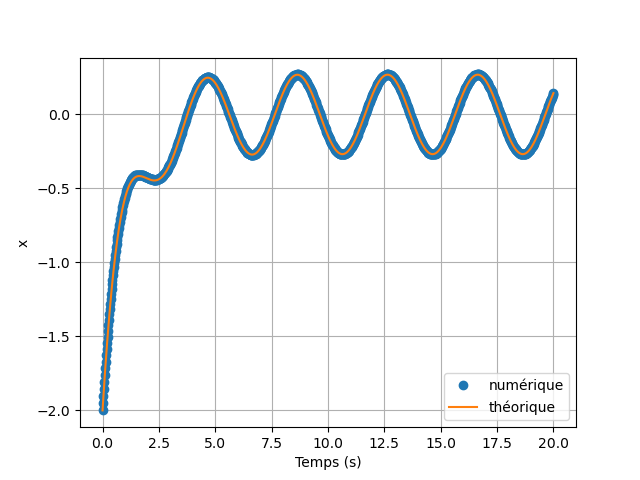

Le temps caractéristique calculé est : 1.000 s
Le temps caractéristique théorique est : 1.000 s


In [4]:
x = [x0]

for i in range(N_time-1):
    x.append(x[i]*(1-dt/tau)+dt/tau*source(i*dt))
    
t = np.linspace(0,L_time,N_time)

plt.figure()
plt.plot(t,x,'o', label='numérique')
# décommenter la ligne suivante si forçage constant
#plt.plot(t,forcage + (x0-forcage)*np.exp(-t/tau), label='théorique')
# décommenter la ligne suivante si forçage sinusoïdal
A=np.sqrt(forcage**2/(1+(tau*2*np.pi/periode)**2))
phi=-np.arctan(tau*2*np.pi/periode)
plt.plot(t,(x0-A*np.cos(phi))*np.exp(-t/tau)+A*np.cos(2*np.pi*t/periode+phi), label='théorique')
plt.grid(True)
plt.legend()
plt.xlabel('Temps (s)')
plt.ylabel('x')
plt.show()

t_th = dt*(forcage-x0)/(x[1]-x[0])
print("Le temps caractéristique calculé est : %.3f s" % t_th)
print("Le temps caractéristique théorique est : %.3f s" % tau)

## Travail à réaliser
On pourra effectuer les tests suivants :
* tester le rôle joué par la discrétisation dans la précision de la solution obtenue en modifiant la valeur de `N` ;
* tester d'autres types de forçage en modifiant la fonction `source`;
* tracer l'évolution de l'écart entre solution théorique et numérique au cours du temps ;
* ...